In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

In [2]:
radius, D = 0.005, 5
dt = (2*radius)**2 / 6./D
duration = 2*10**-2
L=1.
with species_attributes():
    A | {'D':str(D),'radius':str(radius)}
m = get_model()

def run():
    w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),radius,rng=rng)
    w.bind_to(m)
    pid,p = w.new_particle(Species('A'),Real3(L,L,L)*0.5)
    PID = pid[0]
    pid,p = w.get_particle(PID)
    oripos = tuple(p.position())
    sim = spatiocyte.SpatiocyteSimulator(w)
    sim.initialize()
    sim.step()
    while sim.t()<duration:
        pid,p = w.get_particle(PID)
        cpos = tuple(p.position())
        if (cpos!=oripos):
            sim.step()
        else:
            #print 'bek to ori',n,sim.t()
            log.append(sim.t())
            break

Nm = 10000   
log = []
for n in range(Nm):      
    run()


6.66666666667e-06
3.33333333333e-06


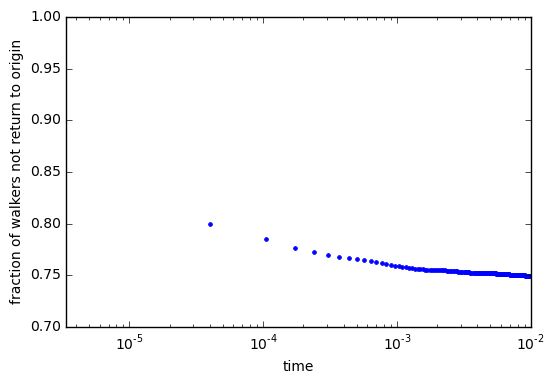

In [9]:
f,bined = np.histogram(log,bins=500)
ff = (Nm-np.cumsum(f))/float(Nm)
#print sum(ff)*Nm,len(log)
print min(log)
print dt
tt = [i*0.5 for i in bined[:-1]+bined[1:]]
plt.semilogx(tt,ff,'.')
plt.xlim(dt,1e-2)
plt.ylim(0.7,1.)
plt.ylabel('fraction of walkers not return to origin')
plt.xlabel('time')

100.0 1.256 1.24042032077


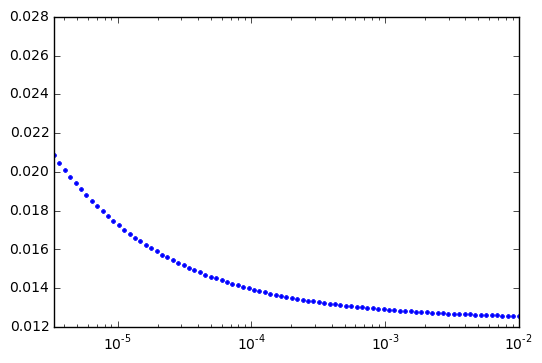

In [11]:
def phix(x):
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def kt(tau):
    tauc = ((ka*2*rm/(ka+kd))**2)/(2*Dt)
    x = ka*((tau/tauc)**(0.5))/kd
    return kon*(1+(ka*phix(x)/kd))

ka = 100.
rm = radius
Dt = D*2.
kd = 4*3.14*2*radius*Dt
kon = ka*kd/(ka+kd)
print ka,kd,kon
#t = np.linspace(0,dt*0.01,1000)
t= np.logspace(-6,-2,100)
plt.xlim(dt,1e-2)
plt.semilogx(t,kt(t)/ka,'.')

In [12]:
with species_attributes():
    A | {'D':str(D),'radius':str(radius)}
    B | {'D':'0.0','radius':str(radius)}
with reaction_rules():
    A + B > B | 100.
m=get_model()
w = spatiocyte.SpatiocyteWorld(Real3(1,1,1),radius,rng=rng)
w.bind_to(m)
w.add_molecules(Species('A'),Nm)
w.add_molecules(Species('B'),1)
sim = spatiocyte.SpatiocyteSimulator(w)
obs = FixedIntervalNumberObserver(dt, ('A'))
sim.run(duration,obs)

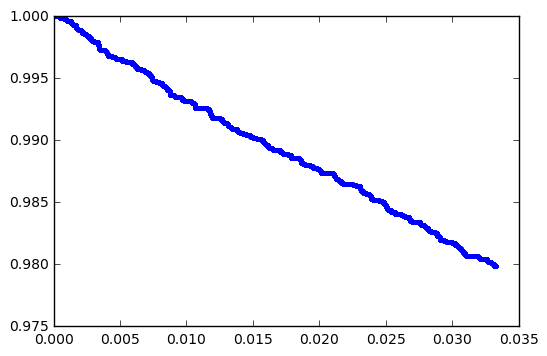

In [15]:
data = np.array(obs.data()).T
t=data[0]
na = data[1]
plt.plot(t,na/Nm,'.')
#plt.xlim(dt,1e-2)
#viz.plot_number_observer(obs)
#viz.plot_number_observer(*observers, *[expfunc(p, N) for p in params], ylim=(N * 0.2, N), legend=False)